<a href="https://colab.research.google.com/github/progvocab/python/blob/main/nlp/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

Importing required libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Initializing 

In [ ]:
tf.compat.v1.disable_eager_execution()
def make_kernel(a):
   a = np.asarray(a)
   a = a.reshape(list(a.shape) + [1,1])
   return tf.constant(a, dtype=1)

def simple_conv(x, k):
   """A simplified 2D convolution operation"""
   x = tf.expand_dims(tf.expand_dims(x, 0), -1)
   y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding = 'SAME')
   return y[0, :, :, 0]

def laplace(x):
   """Compute the 2D laplacian of an array"""
   laplace_k = make_kernel([[0.5, 1.0, 0.5], [1.0, -6., 1.0], [0.5, 1.0, 0.5]])
   return simple_conv(x, laplace_k)
   
"""sess = tf.InteractiveSession() -outdated """
sess=tf.compat.v1.InteractiveSession()


Add data for Graph

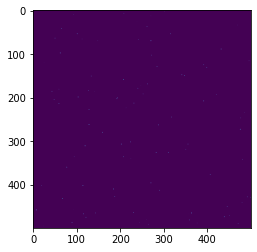

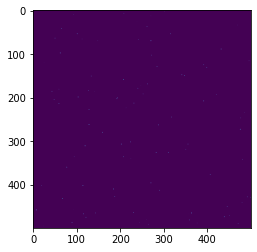

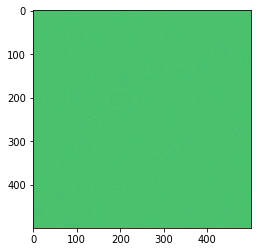

In [ ]:
N = 500

# Initial Conditions -- some rain drops hit a pond

# Set everything to zero
u_init = np.zeros([N, N], dtype = np.float32)
ut_init = np.zeros([N, N], dtype = np.float32)

# Some rain drops hit a pond at random points
for n in range(100):
   a,b = np.random.randint(0, N, 2)
   u_init[a,b] = np.random.uniform()

plt.imshow(u_init)
plt.show()

# Parameters:
# eps -- time resolution
# damping -- wave damping

eps = tf.compat.v1.placeholder(tf.float32, shape = ())
damping = tf.compat.v1.placeholder(tf.float32, shape = ())

# Create variables for simulation state
U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

# Discretized PDE update rules
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

# Operation to update the state
step = tf.group(U.assign(U_), Ut.assign(Ut_))

# Initialize state to initial conditions
tf.compat.v1.initialize_all_variables().run()

# Run 1000 steps of PDE
for i in range(1000):
   # Step simulation
   step.run({eps: 0.03, damping: 0.04})
   
   # Visualize every 50 steps
   if i % 500 == 0:
      plt.imshow(U.eval())
      plt.show()